In [129]:
import pandas as pd
import numpy as np

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [130]:
root_dir = '/Users/g.heimann/repos/adidas_SOS_arima/'

In [226]:
df = pd.read_excel(root_dir + 'data/sos_adidas.xlsx', index_col=0).T

In [227]:
df.tail()

date,Germany
2021-07-01,0.153422
2021-08-01,0.159004
2021-09-01,0.149196
2021-10-01,0.148223
2021-11-01,0.142251


In [229]:
df.shape

(49, 1)

In [148]:
#df['2019':]

In [230]:
y = df['Germany']

n_periods = 12

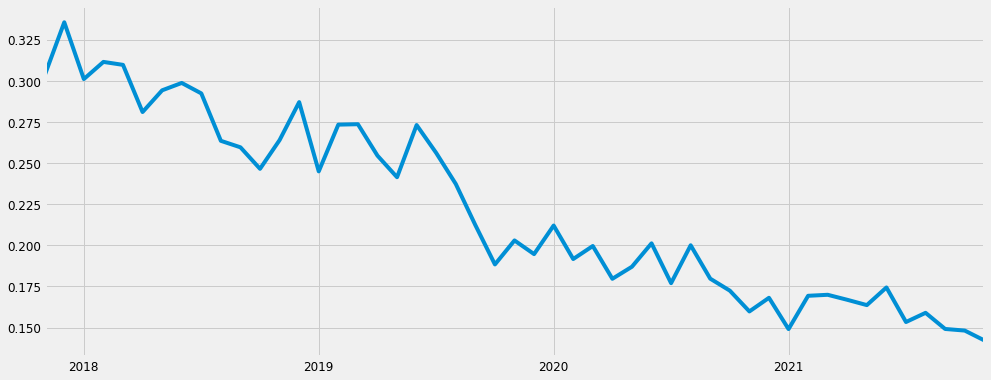

In [231]:
#plotting the data
y.plot(figsize=(15, 6))
plt.show()

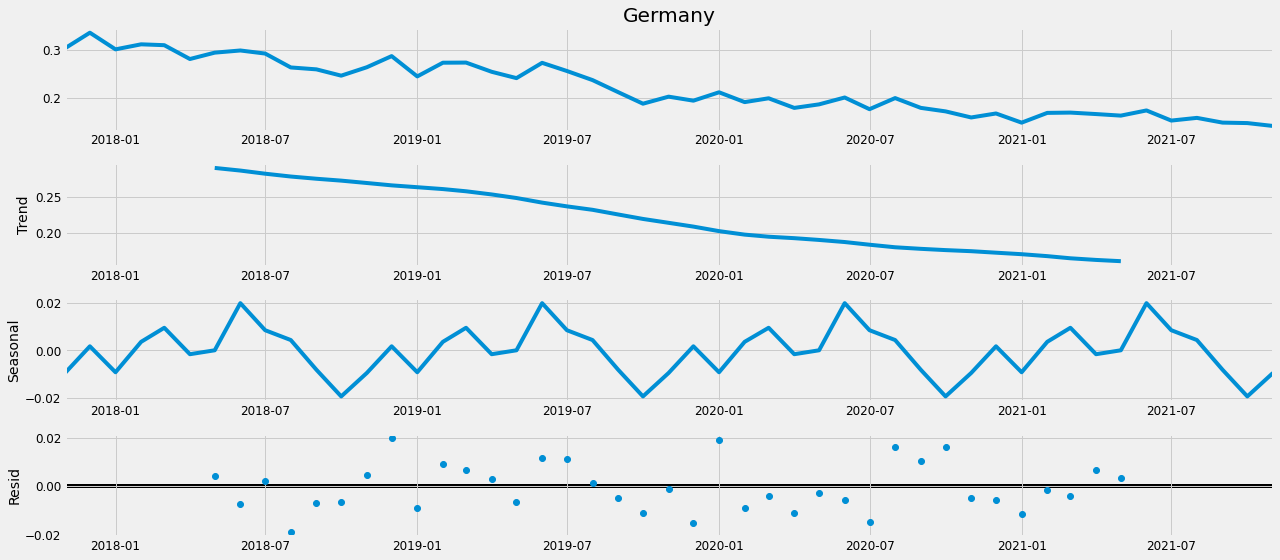

In [232]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [413]:
### this is optional

p = range(0, 3)
d = range(1, 3)
q = range(1,2)
d2= range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d2, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 2, 1) x (0, 1, 1, 12)
SARIMAX: (0, 2, 1) x (1, 0, 1, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)
SARIMAX: (1, 1, 1) x (2, 0, 1, 12)


In [414]:
a= list()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                           # enforce_stationarity=False,
                                           # enforce_invertibility=False
                                           )
            i=i+1
            results = mod.fit(full_output=False,disp=False)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append([param, param_seasonal, results.aic])
            
        except:
            continue

ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-255.52328837088135
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-187.15486806725056
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-256.06677647445065
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-184.95701264579586
ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:-253.95858510524602
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:-183.24039291130484
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:-236.26013713497596
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:-164.6123453736233
ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:-235.50888244937235
ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:-163.00007798969048
ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:-233.45460855689882
ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:-161.62036504408758
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-254.7240407583805
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-186.0546626609899
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-255.29095822057388
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-183.71757049854426
ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:-253.20236758049106
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - A

In [407]:
search_results = pd.DataFrame (a, columns = ['param','param_seasonal','AIC'])
search_results[search_results.AIC<0].sort_values(by='AIC',ascending=False).head(20)

,param,param_seasonal,AIC
7,"(0, 2, 1)","(0, 2, 1, 12)",-79.197145
11,"(0, 2, 1)","(2, 2, 1, 12)",-81.227027
9,"(0, 2, 1)","(1, 2, 1, 12)",-82.870983
31,"(2, 2, 1)","(0, 2, 1, 12)",-85.150021
35,"(2, 2, 1)","(2, 2, 1, 12)",-85.983110
19,"(1, 2, 1)","(0, 2, 1, 12)",-87.090920
33,"(2, 2, 1)","(1, 2, 1, 12)",-88.037304
23,"(1, 2, 1)","(2, 2, 1, 12)",-88.545590
21,"(1, 2, 1)","(1, 2, 1, 12)",-90.669561
25,"(2, 1, 1)","(0, 2, 1, 12)",-95.635120


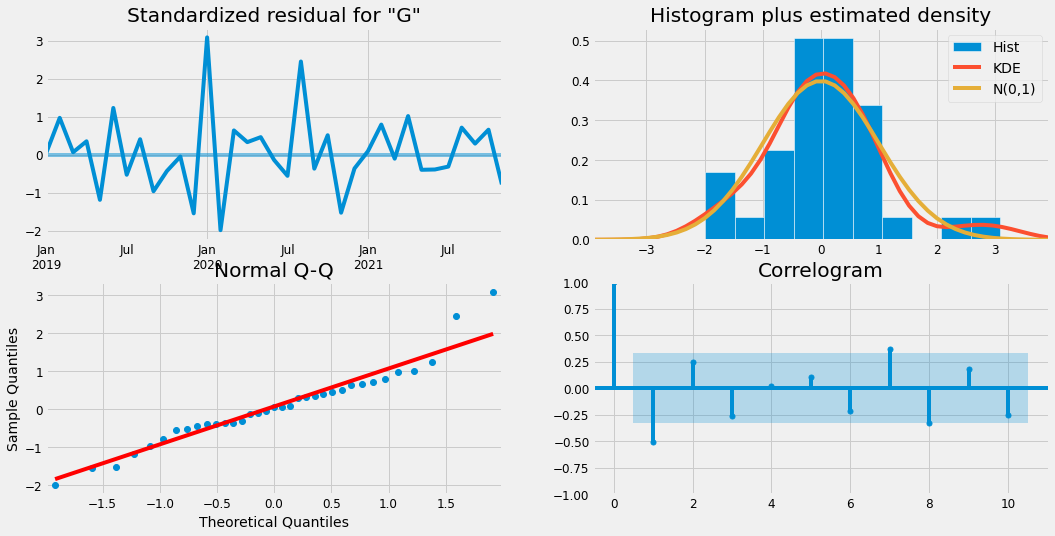

In [409]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 2, 1),
                                seasonal_order=(0, 1, 1, 12)
                               )

results = mod.fit(full_output=False,disp=False)
results.plot_diagnostics(figsize=(16, 8))
plt.show()

<AxesSubplot:>

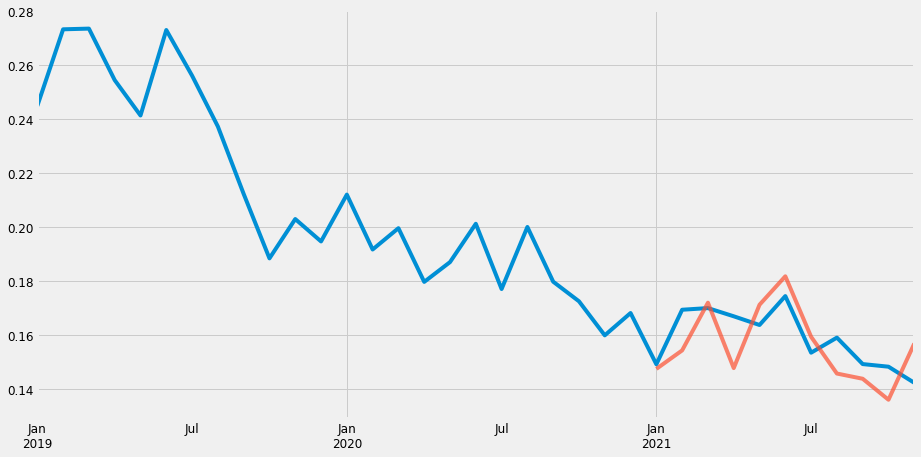

In [410]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

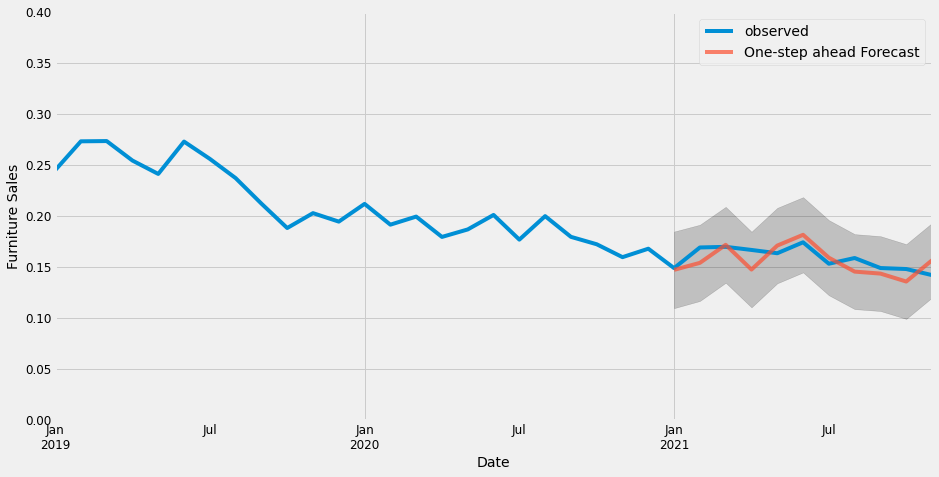

In [411]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.ylim(0, 0.4)
plt.show()

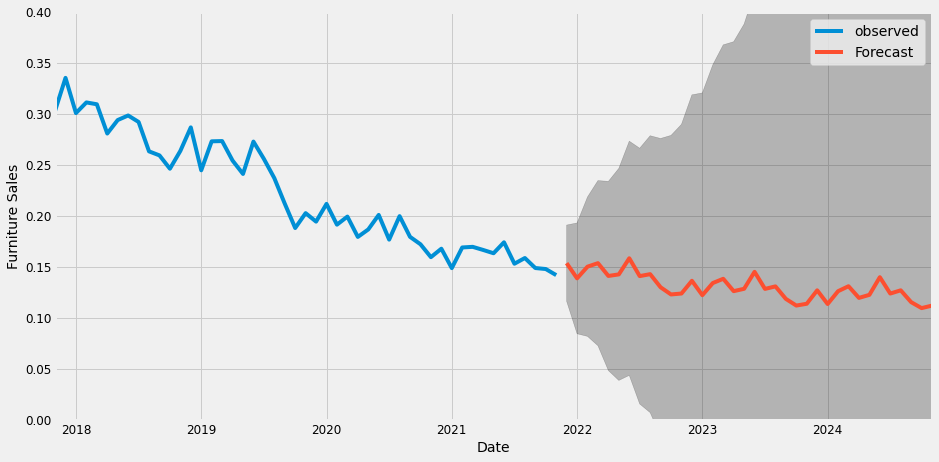

In [404]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.ylim(0, 0.4)
plt.show()

In [135]:
#building the model
from pmdarima.arima import auto_arima
#model = auto_arima(train, seasonal=True, m=12)
model = auto_arima(train,enforce_invertability=True)
model

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [136]:
from pandas.tseries.offsets import DateOffset

add_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,n_periods) ]
add_dates

[Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00')]

In [137]:
predict = model.predict(n_periods=n_periods-1)
predict

array([0.13976276, 0.13616434, 0.13256591, 0.12896748, 0.12536906,
       0.12177063, 0.11817221, 0.11457378, 0.11097536, 0.10737693,
       0.10377851])

In [138]:
future_dates = pd.DataFrame(index=add_dates[0:],columns=df.columns)

In [139]:
df_predict = pd.DataFrame(predict,
                          index=future_dates.index, columns=['Prediction'])

<AxesSubplot:>

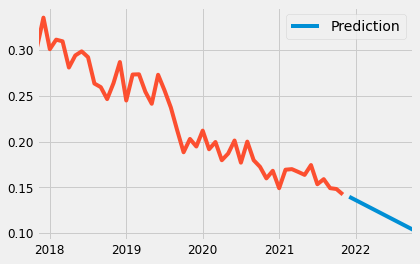

In [140]:
df_predict.plot()
train.plot()

In [141]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [142]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.33060D-02    |proj g|=  6.80138D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      6      1     0     0   1.459D-07  -6.337D-02
  F =  -6.3368057168402853E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-4.21006960250348
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f= -1.96259D+00    |proj g|=  2.71187D-01

At iterate   25    f= -1.96263D+00    |proj g|=  3.05257D+00

At iterate   30    f= -1.96924D+00    |proj g|=  1.82514D+00

At iterate   35    f= -1.99188D+00    |proj g|=  4.74777D+01

At iterate   40    f= -2.05383D+00    |proj g|=  9.72380D+00

At iterate   45    f= -2.06341D+00    |proj g|=  2.30280D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     47     73      1     0     0   6.697D-03  -2.063D+00
  F =  -2.0634137026621833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-196.214542860

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f= -1.06528D+00    |proj g|=  1.05433D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     68      2     0     0   1.054D-02  -1.065D+00
  F =  -1.0652774489218453     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-98.39718999434083
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48969D-01    |proj g|=  2.34831D+00

At iterate    5    f= -6.62116D-01    |proj g|=  6.54794D-01

At iterate   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     62      2     0     0   4.491D+04   9.994D+00
  F =   9.9937930561221400     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:985.3917194999697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46100D-01    |proj g|=  3.41831D+00

At iterate    5    f= -1.95588D+00    |proj g|=  1.38498D+00

At iterate   10    f= -2.00081D+00    |proj g|=  1.68170D-03

           * *

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.02162D+00    |proj g|=  8.34259D-01

At iterate   10    f= -1.03323D+00    |proj g|=  6.71830D-02

At iterate   15    f= -1.03325D+00    |proj g|=  7.85881D-02

At iterate   20    f= -1.03326D+00    |proj g|=  2.68532D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     43      1     0     0   4.725D-03  -1.033D+00
  F =  -1.0332646693555967     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-95.25993759684847
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     67      1     0     0   4.435D-03  -1.067D+00
  F =  -1.0674018129984963     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-96.60537767385264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49323D+00    |proj g|=  1.29883D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     47      1     0     0   1.908D-02  -1.174D+00
  F =  -1.1735845485832868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-111.0112857611621
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.95703D+00    |proj g|=  2.70119D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f= -1.12973D+00    |proj g|=  7.56484D+00

At iterate   15    f= -1.16706D+00    |proj g|=  1.97936D-02
  ys=-8.016E-11  -gs= 5.855E-10 BFGS update SKIPPED
  ys=-3.344E-12  -gs= 1.893E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     42      1     2     0   1.867D-02  -1.167D+00
  F =  -1.1670615236973931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-108.37202932234452
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     49      2     0     0   9.065D-03  -1.785D+00
  F =  -1.7854603901419763     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-170.9751182339137
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.17118D+00    |proj g|=  5.25169D+00

At iterate    5    f= -1.17885D+00    |proj g|=  6.66336D-01

At iterate   10    f= -1.20990D+00    |proj g|=  1.56509D+01

At iterate   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     59      2     0     0   1.797D+05   1.404D+01
  F =   14.035071074752480     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1383.4369653257431
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.27889D+00    |proj g|=  6.32906D+00

At iterate    5    f= -1.28892D+00    |proj g|=  3.06185D-01

At iterate   10    f= -1.29172D+00    |proj g|=  4.53597D-01

           * 

 This problem is unconstrained.



At iterate   30    f= -1.26250D+00    |proj g|=  7.74222D-02

At iterate   35    f= -1.26281D+00    |proj g|=  8.96023D-04

At iterate   40    f= -1.26282D+00    |proj g|=  1.36017D-02
  ys=-1.712E-12  -gs= 2.165E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     88      1     1     0   1.563D-02  -1.263D+00
  F =  -1.2628177608933804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-115.75614056755128
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0        


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.93277D+00    |proj g|=  4.43770D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     71      3     1     0   3.610D+01  -1.933D+00
  F =  -1.9327714355462449     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-183.411600683532
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78283D+00    |proj g|=  1.94660D-02
  ys=-1.386E-11  -gs= 2.913E-12 BFGS update SKIPPED

           * * *

Tit   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     60      2     0     0   7.761D+04   1.019D+01
  F =   10.188684390425824     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1004.4910702617307
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.83345D+00    |proj g|=  8.60025D+00

At iterate    5    f= -1.84151D+00    |proj g|=  7.93485D-01

At iterate   10    f= -1.88475D+00    |proj g|=  1.17190D+01

At iterate   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-183.4691283148351
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.17291D-01    |proj g|=  3.47057D+01

At iterate    5    f= -9.98134D-01    |proj g|=  8.82388D+00

At iterate   10    f= -1.13085D+00    |proj g|=  9.46221D+00

At iterate   15    f= -1.20776D+00    |proj g|=  4.23787D-03
  ys=-1.087E-08  -gs= 3.966E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     75      2     1     0   1.530D-02  -1.20

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     70      3     1     0   4.595D+01  -1.991D+00
  F =  -1.9914417217008920     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-187.16128872668742
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.84184D+00    |proj g|=  4.75409D+00

At iterate    5    f= -1.84763D+00    |proj g|=  3.03631D+00

At iterate   10    f= -1.85076D+00    |proj g|=  2.90885D-03

At iterate  

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -1.98511D+00    |proj g|=  5.78384D+00

At iterate   10    f= -2.02532D+00    |proj g|=  1.14168D-01

At iterate   15    f= -2.02806D+00    |proj g|=  5.40737D+00

At iterate   20    f= -2.10485D+00    |proj g|=  3.54248D+00

At iterate   25    f= -2.10687D+00    |proj g|=  8.76861D-02

At iterate   30    f= -2.10719D+00    |proj g|=  1.26820D+00

At iterate   35    f= -2.10757D+00    |proj g|=  9.50958D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     58      1     0     0   9.400D-04  -2.108D+00
  F =  -2.1075703633724499     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-185.34156030918143
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.84953D-01    |proj g|=  2.47791D+01

At iterate    5    f= -1.06283D+00    |proj g|=  1.38503D+00

At iterate   10    f= -1.11051D+00    |proj g|=  2.47030D-01

At iterate   15    f= -1.25419D+00    |proj g|=  1.03339D+01

At iterate   20    f= -1.32103D+00    |proj g|=  1.31780D-01

At iterate   25    f= -1.34201D+00    |proj g|=  3.47819D+00

At iterate   30    f= -1.36624D+00    |proj g|=  3.94161D-01
  ys=-2.765E-09  -gs= 7.404E-10 BFGS update SKIPPED

At iterate   35    f= -1.36662D+00    |proj g|=  1.15795D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36    116      3     1     0   1.158D-02  -1.367D+00
  F =  -1.3666182443360579     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-125.92858794493367
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.07745D+00    |proj g|=  1.04062D+01

At iterate    5    f= -1.10123D+00    |proj g|=  4.19887D+00

At iterate   10    f= -1.14019D+00    |proj g|=  4.36833D-01

At iterate  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-5.714E-10  -gs= 1.160E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     13      2     1     0   2.600D-02  -1.857D+00
  F =  -1.8569541004168550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-177.9815018408518
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.19847D+00    |proj g|=  2.41196D+00

At iterate    5    f= -1.19993D+00    |proj g|=  1.15525D+00

At iterate   10    f= -


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   40    f= -1.27125D+00    |proj g|=  5.33863D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40    122      3     1     0   5.339D-03  -1.271D+00
  F =  -1.2712511595680744     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-118.58261363767129
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.99973D+00    |proj g|=  9.90015D+00

At iterate    5    f= -2.01077D+00    |proj g|=  1.49437D-01

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     60      2     0     0   1.004D+05   1.519D+01
  F =   15.189101418007461     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1496.5319389647311
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.25879D+00    |proj g|=  4.29501D+00

At iterate    5    f= -1.26236D+00    |proj g|=  1.95875D-01

At iterate   10    f= -1.26568D+00    |proj g|=  1.76388D-01

At iterate   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25    139      3     2     0   5.490D-03  -1.266D+00
  F =  -1.2658522624749029     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-118.0535217225405
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.19847D+00    |proj g|=  2.41196D+00

At iterate    5    f= -1.20003D+00    |proj g|=  1.26745D+00

At iterate   10    f= -1.24496D+00    |proj g|=  9.51864D+00

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     16      1     0     0   3.164D-02  -2.533D+00
  F =  -2.5332974662922725     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-242.2631516966427
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10204D+01    |proj g|=  4.16595D+01
  ys=-6.181E-01  -gs= 3.462E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.01488D+00    |proj g|=  2.35143D+00

At iterate   25    f= -2.01868D+00    |proj g|=  2.90689D-02

At iterate   30    f= -2.01993D+00    |proj g|=  2.92215D+00

At iterate   35    f= -2.03368D+00    |proj g|=  1.51239D+00

At iterate   40    f= -2.03412D+00    |proj g|=  2.15929D-01

At iterate   45    f= -2.03412D+00    |proj g|=  2.55830D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     61      1     0     0   7.374D-03  -2.034D+00
  F =  -2.0341212609692358     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-191.343883574


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -1.25959D+00    |proj g|=  8.69282D-02

At iterate   10    f= -1.26210D+00    |proj g|=  2.99343D+00

At iterate   15    f= -1.26810D+00    |proj g|=  7.97434D-02

At iterate   20    f= -1.27717D+00    |proj g|=  1.52480D+00

At iterate   25    f= -1.27894D+00    |proj g|=  1.20908D+00

At iterate   30    f= -1.29303D+00    |proj g|=  5.63622D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     80      2     0     0   3.015D-03  -1.293D+00
  F =  -1.2934723018133427     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-118.760285577

 This problem is unconstrained.



At iterate    5    f= -1.19286D+00    |proj g|=  1.95937D+00

At iterate   10    f= -1.25603D+00    |proj g|=  1.75219D+00

At iterate   15    f= -1.25861D+00    |proj g|=  4.71886D-01

At iterate   20    f= -1.25974D+00    |proj g|=  1.45261D-02

At iterate   25    f= -1.25994D+00    |proj g|=  1.01024D-01

At iterate   30    f= -1.26043D+00    |proj g|=  1.38011D-01

At iterate   35    f= -1.26411D+00    |proj g|=  2.40840D+00

At iterate   40    f= -1.26628D+00    |proj g|=  2.90769D+00

At iterate   45    f= -1.26835D+00    |proj g|=  2.20529D-01

At iterate   50    f= -1.26837D+00    |proj g|=  5.02305D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [143]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
ARMAmodel = SARIMAX(train, order = (1, 0, 1)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.20829D+00    |proj g|=  7.00620D+01

At iterate    5    f= -2.37939D+00    |proj g|=  5.88506D-01

At iterate   10    f= -2.43352D+00    |proj g|=  1.36549D+01

At iterate   15    f= -2.51109D+00    |proj g|=  1.83812D-01

At iterate   20    f= -2.52657D+00    |proj g|=  6.57955D+00

At iterate   25    f= -2.59788D+00    |proj g|=  6.26901D-01

At iterate   30    f= -2.60434D+00    |proj g|=  7.50669D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


In [144]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [145]:

mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.25475D+00    |proj g|=  4.84531D+00

At iterate    5    f= -1.25959D+00    |proj g|=  8.69282D-02

At iterate   10    f= -1.26210D+00    |proj g|=  2.99343D+00

At iterate   15    f= -1.26810D+00    |proj g|=  7.97434D-02

At iterate   20    f= -1.27717D+00    |proj g|=  1.52480D+00

At iterate   25    f= -1.27894D+00    |proj g|=  1.20908D+00

At iterate   30    f= -1.29303D+00    |proj g|=  5.63622D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [146]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1152x576 with 0 Axes>

In [87]:
predict2 = ARMAmodel.predict(n_periods=1)
predict2

2020-05-01    0.000000
2020-06-01    0.186455
2020-07-01    0.195637
2020-08-01    0.184785
2020-09-01    0.193248
2020-10-01    0.185501
2020-11-01    0.178032
2020-12-01    0.167672
2021-01-01    0.167795
2021-02-01    0.157164
2021-03-01    0.163887
2021-04-01    0.167169
2021-05-01    0.166893
2021-06-01    0.164961
2021-07-01    0.170144
2021-08-01    0.160610
2021-09-01    0.159580
2021-10-01    0.153616
2021-11-01    0.150463
Freq: MS, Name: predicted_mean, dtype: float64

In [85]:
df_predict2 = pd.DataFrame(predict2,
                          index=future_dates.index, columns=['Prediction'])
df_predict2

,Prediction
2021-12-01,NaN
2022-01-01,NaN
2022-02-01,NaN
2022-03-01,NaN
2022-04-01,NaN
2022-05-01,NaN
2022-06-01,NaN
2022-07-01,NaN
2022-08-01,NaN
2022-09-01,NaN


<AxesSubplot:>

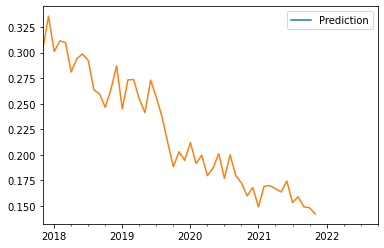

In [81]:
df_predict2 = pd.DataFrame(predict2,
                          index=future_dates.index, columns=['Prediction'])
df_predict2.plot()
df['Germany'].plot()